# LargeVis
1. ***Constructs an accurately approximated K-nearest neighbor graph***.
2. ***Layouts the graph in the low-dimensional space***. 

# Comparing to t-SNE
* Significantly ***reduces the computational cost*** of the graph construction step
* Employs a principled probabilistic model for the visualization step The objective of which can be effectively optimized through asynchronous stochastic gradient descent with a ***linear time complexity***.

* The whole procedure thus easily ***scales*** to millions of highdimensional data points.

* Experimental results on real-world data sets demonstrate that the LargeVis ***outperforms*** the state-of-the-art methods in both efficiency and effectiveness.

* The hyper-parameters of LargeVis are also much more ***stable*** over different data sets.

# Constructing K-nearest neighbor graph
1. Random projection trees used to approximate the KNN graph
2. Algorithm starts by partitioning the entire space and building up a tree
3. For every non-leaf node of the tree, the algorithm selects a random hyperplane to split the subspace corresponding to the non-leaf node into two, which become the children of that node
4. This process continues until the number of nodes in the subspace reaches a threshold
5. Once a random projection tree is constructed, every data point can traverse the tree to find a corresponding leaf node. The points in the subspace of that leaf node will be treated as the candidates of the nearest neighbors of the input data point.
6. In practice multiple trees can be built to improve the accuracy of the nearest neighbors.
7. Once the nearest neighbors of all the data points are found, the K-nearest neighbor graph is built.

### Constructing a very accurate KNN graph requires many trees to be built, which significantly hurts the efficiency

Instead of building a large number of trees to obtain a highly accurate KNN graph, we use neighbor exploring techniques to improve the accuracy of a less accurate graph. The basic idea is that “a neighbor of my neighbor is also likely to be my neighbor”

For each node of the graph, we search the neighbors of its neighbors, which are also likely to be candidates of its nearest neighbors. We may repeat this for multiple iterations to improve the accuracy of the graph. In practice, we find that only a few iterations are sufficient
to improve the accuracy of the KNN graph to almost 100%.

# Projection into 2D/3D
**principled probabilistic model** - idea is to preserve the similarities of the vertices in the low-dimension, we want to keep similar vertices close to each other and dissimilar vertices far apart in the low-dimensional space.

Directly maximizing cost function is computationally expensive - ***randomly sample*** some negative edges for model optimization

***Asynchronous stochastic gradient descent*** for optimalization

Time complexity - ***linear*** to numbber of nodes

In [3]:
from mpl_toolkits import mplot3d
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS
from sklearn.decomposition import PCA, KernelPCA
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.neighbors import NearestNeighbors
import nltk

In [5]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X = np.asarray([mnist.data[x] for x in range(0, 70000, 20)])
Y = np.asarray([mnist.target[x] for x in range(0, 70000, 20)])
print(X.shape)

(3500, 784)


/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
bhsne = TSNE(method='barnes_hut')

In [7]:
def show_chart(points, classes, labels, figsize=(12, 12)):
    target_ids = range(len(labels))

    plt.figure(figsize=figsize)
    for i, label in zip(target_ids, labels):
        plt.scatter(points[classes==i, 0], points[classes==i, 1], label=label)

    plt.legend()
    plt.show()

In [18]:
x_tsne = bhsne.fit_transform(X)

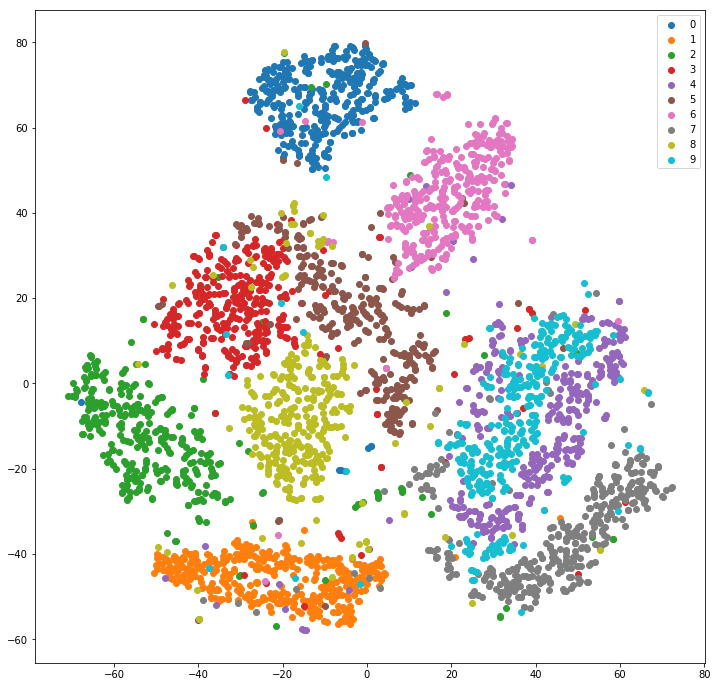

In [19]:
show_chart(x_tsne, Y, [str(x) for x in range(0, 10)])

In [8]:
type(X)

numpy.ndarray

In [10]:
# now run Large Vis!
import LargeVis

# LargeVis doesn't take named arguments, so we have to pass all these explicitly, using -1 to indicate defaults 
# (this is handled more smoothly by argparse when calling from command line)

outdim = 2
threads = 24
samples = -1
prop = -1
alpha = -1
trees = -1
neg = -1
neigh = -1
gamma = -1
perp = -1

# LargeVis.loadfile("lv_format.txt")
LargeVis.loadarray(X)
Y = LargeVis.run(outdim, threads, samples, prop, alpha, trees, neg, neigh, gamma, perp)

# LargeVis.save("lv_output.txt")


SystemError: <built-in function loadarray> returned NULL without setting an error